In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [4]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `df` is a pandas DataFrame with the following columns:
# 'Category' for domain categories like 'Enzyme activity', 'Binding', etc.
# 'Method' for different computational methods
# 'Correlation' for Spearman correlation values
# 'MSA_Size' for MSA effective size, which could affect the size of the markers

# Example data (this should be replaced with your actual data)
np.random.seed(0)
n = 50  # number of points
df = pd.DataFrame({
    'Category': np.random.choice(['Enzyme activity', 'Binding', 'Other'], size=n),
    'Method': np.random.choice(['Augmented EVmutation Potts', 'DeepSequence VAE', 'eUniRep regression'], size=n),
    'Correlation': np.random.uniform(0.2, 0.8, size=n),
    'MSA_Size': np.random.choice([48, 4530, 15462], size=n)
})

# Map methods to markers
marker_dict = {
    'Augmented EVmutation Potts': 'v',
    'DeepSequence VAE': 'o',
    'eUniRep regression': '^'
}

# Map MSA sizes to point sizes
size_dict = {48: 50, 4530: 150, 15462: 300}

# Create a color palette
palette = sns.color_palette("hsv", len(df['Method'].unique()))
color_dict = dict(zip(df['Method'].unique(), palette))


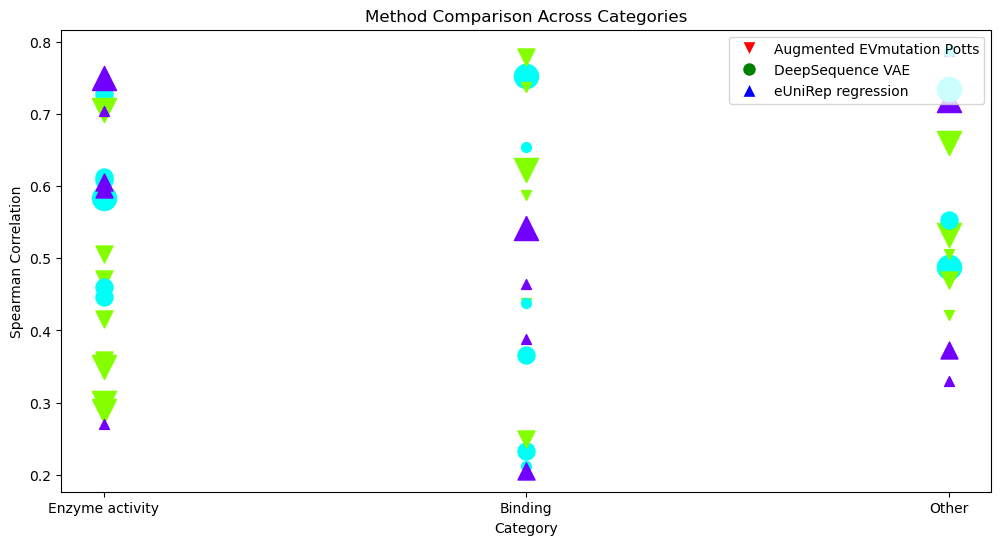

In [5]:
# Create a large figure
plt.figure(figsize=(12, 6))

# Loop through each category to create subplots or sections in a single plot
for category in df['Category'].unique():
    subset = df[df['Category'] == category]
    for i, row in subset.iterrows():
        plt.scatter(x=category, y=row['Correlation'], marker=marker_dict[row['Method']],
                    color=color_dict[row['Method']], s=size_dict[row['MSA_Size']])

# Customizing the plot
plt.xlabel('Category')
plt.ylabel('Spearman Correlation')
plt.title('Method Comparison Across Categories')

# Creating a custom legend for markers
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='v', color='w', label='Augmented EVmutation Potts',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='DeepSequence VAE',
                          markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='eUniRep regression',
                          markerfacecolor='b', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')

# Show plot
plt.show()


In [6]:
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot.csv")